機械学習特論 第6回 決定木 で mnist を分類

In [37]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [39]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロード
from sklearn.datasets import fetch_openml
# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

In [40]:
# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=2) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

x_train:5250 x_test:1750 y_train:5250 y_test:1750


max_depth=1, accuracy_score:  train data :  0.20476 test data :  0.192


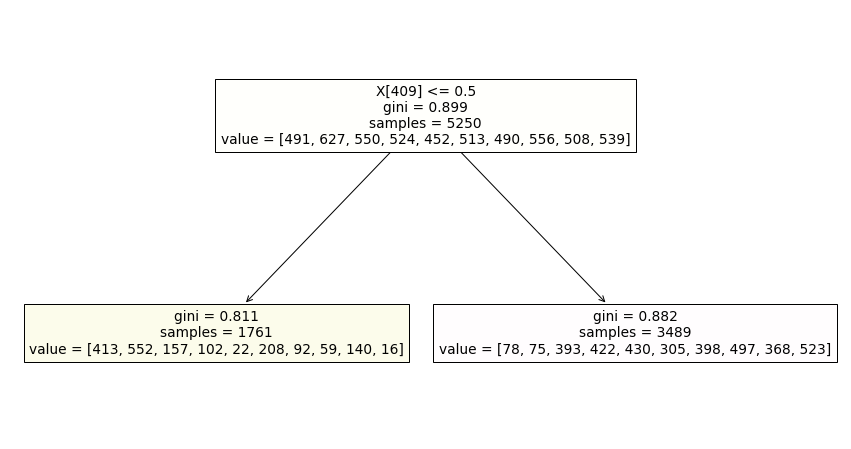

In [41]:
# 決定木を学習データを利用して学習
clf = DecisionTreeClassifier(max_depth=1, # 木の深さの最大
                             random_state=2) # 乱数シード
clf = clf.fit(x_train, y_train)

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)
print('max_depth=1, accuracy_score: ', 
      f'train data : {metrics.accuracy_score(y_train, predict_train): 0.5}', 
      f'test data : {metrics.accuracy_score(y_test, predict_test): 0.5}')

# 決定木を表示
plt.figure(figsize=[15,8])
plot_tree(clf, filled=True)
plt.show()

max_depth=1, accuracy_score:  train data :  0.20476 test data :  0.192
max_depth=2, accuracy_score:  train data :  0.33848 test data :  0.34171
max_depth=3, accuracy_score:  train data :  0.47619 test data :  0.46114
max_depth=4, accuracy_score:  train data :  0.62286 test data :  0.608
max_depth=5, accuracy_score:  train data :  0.69352 test data :  0.65314
max_depth=6, accuracy_score:  train data :  0.75867 test data :  0.70914
max_depth=7, accuracy_score:  train data :  0.81638 test data :  0.73257
max_depth=8, accuracy_score:  train data :  0.86705 test data :  0.74229
max_depth=9, accuracy_score:  train data :  0.91562 test data :  0.75429
max_depth=10, accuracy_score:  train data :  0.95314 test data :  0.75429
max_depth=11, accuracy_score:  train data :  0.97467 test data :  0.75314
max_depth=12, accuracy_score:  train data :  0.98857 test data :  0.74514
max_depth=13, accuracy_score:  train data :  0.99352 test data :  0.752
max_depth=14, accuracy_score:  train data :  0.99695 

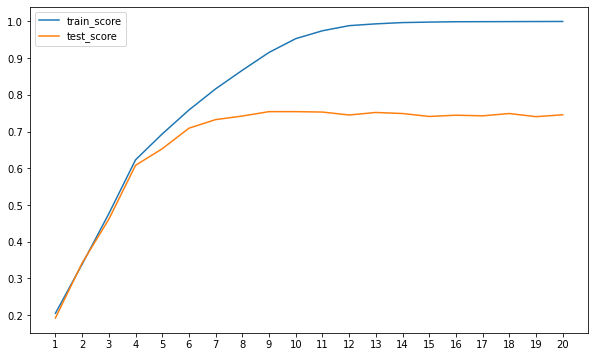

In [44]:
# 木の深さを変えて学習した決定木の性能を学習用データと検証用データで確認
N = 20
_x = np.linspace(1, N, N) # グラフのx軸の設定 (1から7までの7点)
train_score = [] # グラフ用のリスト
test_score = [] # グラフ用のリスト
for i in range(N): # 木の深さは 1-7 (iに1を足して利用)
    # 決定木を学習データを利用して学習
    clf = DecisionTreeClassifier(max_depth=i+1, # 木の深さの最大
                                random_state=1) # 乱数シード
    clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    # 計算した性能はグラフ用のリストに格納
    predict_train = clf.predict(x_train)
    train_score.append(metrics.accuracy_score(y_train, predict_train))
    predict_test = clf.predict(x_test)
    test_score.append(metrics.accuracy_score(y_test, predict_test))
    print(f'max_depth={i+1}, accuracy_score: ', 
          f'train data : {train_score[i]: 0.5}', 
          f'test data : {test_score[i]: 0.5}')

# 木の深さに対する決定木の性能をグラフで表示
plt.figure(figsize=[10,6])
plt.plot(_x, train_score, label='train_score')
plt.plot(_x, test_score, label='test_score')
plt.legend()
plt.xticks(_x)
plt.show()

max_depth=3, accuracy_score:  train data :  0.95333 test data :  0.75371
重要度がゼロの画素数: 547 / 784 (0.6977040816326531)
重要度が高い画素(上位20件):
0 (378, 0.06255289950234179) 0.06255289950234179
1 (409, 0.05039779367371478) 0.11295069317605658
2 (155, 0.0500883405456876) 0.16303903372174416
3 (432, 0.04121576250185972) 0.20425479622360387
4 (211, 0.03650930136490678) 0.24076409758851064
5 (657, 0.03584708140816567) 0.2766111789966763
6 (462, 0.032773288927202916) 0.30938446792387925
7 (487, 0.02995104075495024) 0.3393355086788295
8 (319, 0.029683288994449386) 0.3690187976732789
9 (377, 0.026207210233585798) 0.3952260079068647
10 (550, 0.022980505348137694) 0.41820651325500235
11 (347, 0.018855455855427805) 0.43706196911043016
12 (296, 0.018139385135488746) 0.4552013542459189
13 (485, 0.017756248329920336) 0.47295760257583924
14 (542, 0.013619388451892927) 0.48657699102773216
15 (243, 0.013051445698318299) 0.49962843672605045
16 (541, 0.013026394870012161) 0.5126548315960626
17 (455, 0.0112837963115

C:\Users\khiramatsu\AppData\Local\Temp/ipykernel_29632/4162756661.py:34: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.array(np.log(img)).reshape(28,28), cmap=plt.cm.gray_r)


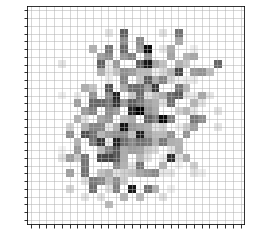

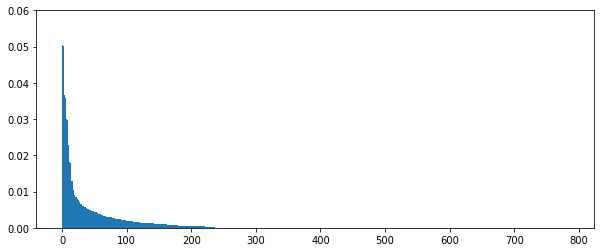

In [51]:
# 決定木を学習データを利用して学習
clf = DecisionTreeClassifier(max_depth=10, # 木の深さの最大
                             random_state=2) # 乱数シード
clf = clf.fit(x_train, y_train)

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)
print('max_depth=10, accuracy_score: ', 
      f'train data : {metrics.accuracy_score(y_train, predict_train): 0.5}', 
      f'test data : {metrics.accuracy_score(y_test, predict_test): 0.5}')

# 画素の重要度を確認
importance = {}
img = []
zero_importance = 0
for i in range(len(clf.feature_importances_)):
    importance[i] = clf.feature_importances_[i]
    img.append(clf.feature_importances_[i])
    if clf.feature_importances_[i] == 0.0:
        zero_importance = zero_importance + 1
print('重要度がゼロの画素数:', zero_importance, '/', len(importance), f'({zero_importance/len(importance)})')
print('重要度が高い画素(上位20件):')
importance_sorted = sorted(importance.items(), key=lambda x:x[1], reverse=True)
i = 0
cumulative_importance = 0
for _importance_sorted in importance_sorted:
    cumulative_importance = cumulative_importance + _importance_sorted[1]
    print(i, _importance_sorted, cumulative_importance)
    i = i + 1
    if i > 100:
        break

plt.imshow(np.array(np.log(img)).reshape(28,28), cmap=plt.cm.gray_r)
plt.xticks(np.linspace(0,27,28))
plt.yticks(np.linspace(0,27,28))
plt.xticks(color="None")
plt.yticks(color="None")
plt.grid(linewidth=0.5)
plt.show()

plt.figure(figsize=[10,4])
plt.bar(np.linspace(0,len(img),len(img)), sorted(img, reverse=True), width=1.0)
plt.ylim(0,0.06)
plt.show()